# Practical spectral analysis

In [2]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

# Linear and Logarithmic Scale
* Linear scale is intuitive, and usually how "raw" frequency data is stored.
    * The height of a frequency "spike" is directly proportional to the amplitude of the frequency component it represents.
* Logarithmic scale often used for spectral analysis of signals.
    * Each "step" along y-axis represents a *mulitplicative* increase in signal power relative to the previous step.
    * Strong signal components do not "overshadow" weak signal components

-0.017109642338161535 0.0


(0.0, 4000.0)

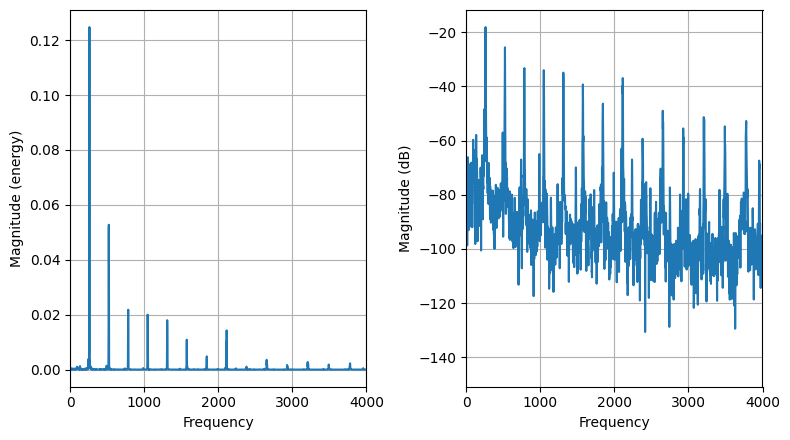

In [4]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("data/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.subplot(1,2,1)
plt.magnitude_spectrum(x, Fs=fs, scale="linear")
plt.xlim([0, 4000])
plt.subplot(1,2,2)
plt.magnitude_spectrum(x, Fs=fs, scale="dB")
plt.xlim([0, 4000])

# Log scale units

## Decibel (dB)
* Typically used for for comparing power of two signals 
    * E.g. input/output of a filter. Measure of filter amplification/attenuation
$$\begin{align}
\text{Amplification (dB)} &= 10 \cdot \log\left(\frac{P_x}{P_y}\right) \\
&= 20 \cdot \log\left(\frac{A_x}{A_y}\right)
\end{align}$$

## Decibel milliwatt (dBm)

* A measure of signal power using $1 \text{ milliWatt (mW)}$ as reference:

$$P_{dBm} = 10 \cdot \log\left(\frac{P}{1\text{ mW}}\right)$$

# Log scale in spectral plots

### $\text{dB}$ per frequency unit (e.g. $\text{Hz}$)

* Useful to compare frequency component's power relative to each other, but not useful for measurement of "absolute" signal power/magnitude.
$$P_{xx}(f)_{dB} = 20 \cdot \log(|X(f)|)$$
* Most common spectrum plot when working with digital signals
    - Working with purely digital numbers, with no implicit mapping to voltage levels, power etc.

### $\text{dBm}$ per frequency unit (e.g. $\text{Hz}$)
* Absolute power of a signal (e.g. radio signal) as a function of frequency.
$$P_{xx}(f)_{dB} = 10 \cdot \log\left(\frac{P_x(f)}{1\text{ mW}}\right)$$
* Less commonly used plot for specialized situations.
    * The *relative* strength of different frequency components in a signal is usually of more interest than the objective power of each frequency unit

# Spectral analysis of noisy signals





* ***All*** signals will contain a degree of noise in addition to the desired signal
$$\text{measured signal} = \text{desired signal} + \text{noise}$$

* White noise is commonly encountered.
    * The amplitude value of the noise at any given time $t$ is *completely* random.

* Noise properties are less challenging to identify in the frequency domain

# Spectral content of white noise

* "White" noise has a flat frequency spectrum *on average*, hence the name.


(-57.49939499495084, 0.0)

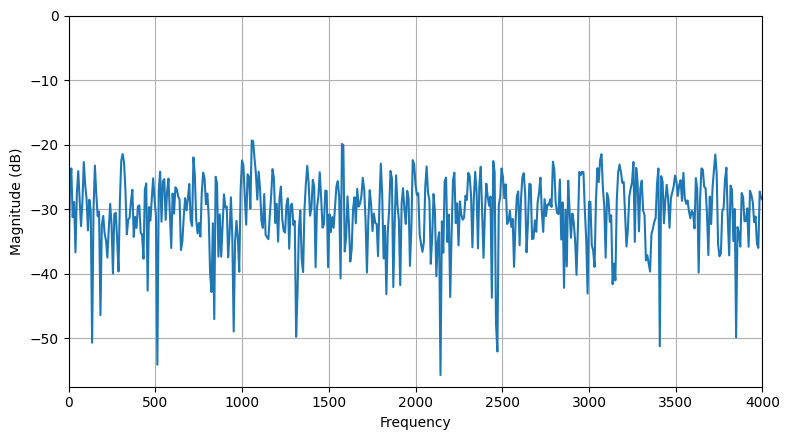

In [16]:
noise = np.random.randn(1000)
plt.magnitude_spectrum(noise, scale="dB", Fs=8000);
plt.ylim(ymax=0)

# Signal-to-noise ratio

* A measure (in $\text{dB}$) of total signal power relative to noise power.
$$SNR = 10 \cdot \log\left(\frac{P_{\text{signal}}}{P_{\text{noise}}}\right)$$
    * Indicates "quality" of a signal. 

* Assuming white noise, signal quality (SNR) may be measured using spectral analysis.
    * How much does the signal's spectral content protrude above the "noise floor"?

# Time-domain view of a noisy signal


Text(0.5, 0, 'time $t$')

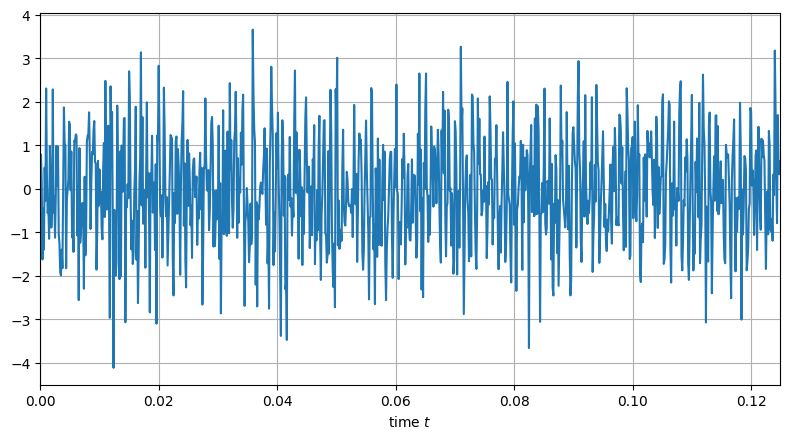

In [21]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)
plt.plot(t, noise+signal);
plt.xlabel("time $t$")

* Close to impossible to make out the signal

# Spectral content of a noisy signal


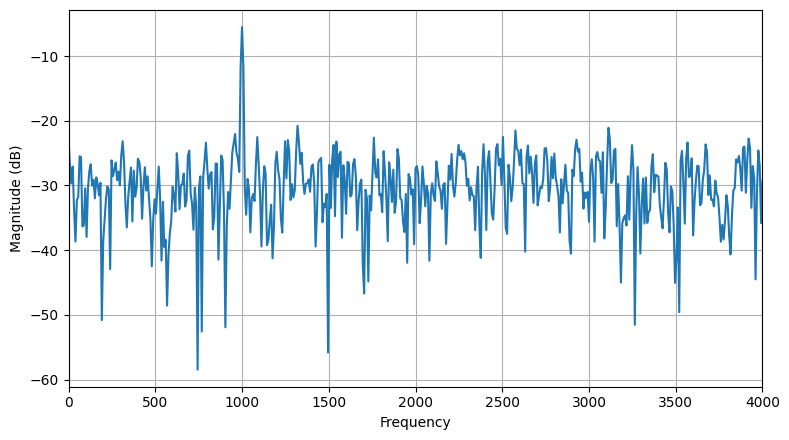

In [17]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)
plt.magnitude_spectrum(noise+signal, scale="dB", Fs=8000);

* Spectral analysis of real-world signals will typically reveal a "noise-floor" resulting from white background noise.
    * The weaker the background noise, the lower this noise floor will be.
* Picking out the signal from background noise is much easier, as it in the example is raised from the "noise floor" by approx $20 \text{ dB}$.

## Estimating SNR using spectral analysis
<img src="figures/sig_noise.png" style="width: 60%; margin-left: 100px" />

# Any Questions?

<br>

<img src="figures/Fig42_xkcd_fourier.jpg" width="50%" />